# **QUESTION 1** 

---




## ***NAIVE BIAS CLASSIFIER***

Using the **Titanic Dataset.**

In [205]:
# importing required modules
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as split

In [206]:
# importing titanic dataset from google drive
data = pd.read_csv("drive/MyDrive/PRML/Lab 3/titanic.csv")
# data = pd.DataFrame.to_numpy(data)  # converting data to numpy framework

### ***1. Perform pre-processing and visualization of the dataset. Split the data into train and test sets. Also identify the useful columns and drop the unnecessary ones***

In [207]:
data

,PassengerId,Name,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,211536,13.0000,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,W./C. 6607,23.4500,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,111369,30.0000,C148,C,1


*a. Removing **'Passenger Id', 'Name' and 'Ticket'** from the features as they are all mostly unique for each passenger.*

In [208]:
data.drop('PassengerId', inplace=True, axis=1)
data.drop('Name', inplace=True, axis=1)
data.drop('Ticket', inplace=True, axis=1)

*b. Counting the number of NaN values in each column and dropping if number of Nan values is more than number of values present.*

In [209]:
print(len(data))

891


In [210]:
# to count and print number of NaN values in each column
data.isna().sum()

Pclass        0
Sex           0
Age         177
Fare          0
Cabin       687
Embarked      2
Survived      0
dtype: int64

In [211]:
# Dropping 'Cabin' as it have 687 NaN values against 891 entries
data.drop('Cabin', inplace=True, axis=1)

*c. Now replacing the empty values in **'Age'** with **mean** as it contains continuous values and the empty values in **'Embarked'** with **mode** as it have discrete values.*

In [212]:
# Replacing NaN in 'Age; with mean
Age_mean = int(data['Age'].mean())+1
print("Mean Age is:", Age_mean)
data['Age'] = data['Age'].fillna(Age_mean)

# Replacing NaN in 'Embarked' with mode
Embkd_mode = (data['Embarked'].mode())[0]
print("Mode of Embarked is:", Embkd_mode)
data['Embarked'] = data['Embarked'].fillna(Embkd_mode)

Mean Age is: 30
Mode of Embarked is: S


In [213]:
# Verifying that no column contains NaN values now
data.isna().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Survived    0
dtype: int64

*d. Converting labels in feature column 'Sex' with 0 for male and 1 for female. And coverting labels in feature column 'Embarked' with 0 for 'S', 1 for 'C' and 2 for 'Q'*

In [214]:
col_sex = data['Sex']
for i in range(0, len(col_sex)):
  if col_sex[i] == "male":
    col_sex[i] = 0
  else:
    col_sex[i] = 1
data['Sex']

<ipython-input-214-080cafb6220e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col_sex[i] = 0
<ipython-input-214-080cafb6220e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col_sex[i] = 1


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: object

In [215]:
col_emb = data['Embarked']
for i in range(0, len(col_emb)):
  if col_emb[i] == "S":
    col_emb[i] = 0
  elif col_emb[i] == "C":
    col_emb[i] = 1
  else:
    col_emb[i] = 2
data['Embarked']

<ipython-input-215-ac0f7b9da791>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col_emb[i] = 0
<ipython-input-215-ac0f7b9da791>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col_emb[i] = 1
<ipython-input-215-ac0f7b9da791>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col_emb[i] = 2


0      0
1      1
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    1
890    2
Name: Embarked, Length: 891, dtype: object

In [216]:
data

,Pclass,Sex,Age,Fare,Embarked,Survived
0,3,0,22.0,7.2500,0,0
1,1,1,38.0,71.2833,1,1
2,3,1,26.0,7.9250,0,1
3,1,1,35.0,53.1000,0,1
4,3,0,35.0,8.0500,0,0
...,...,...,...,...,...,...
886,2,0,27.0,13.0000,0,0
887,1,1,19.0,30.0000,0,1
888,3,1,30.0,23.4500,0,0
889,1,0,26.0,30.0000,1,1


[33.90092879256966, 55.357142857142854, 38.96103896103896]


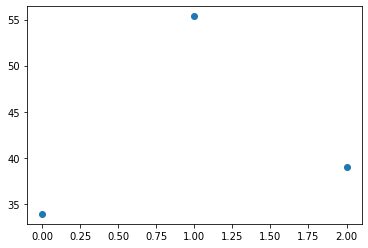

In [217]:
import matplotlib.pyplot as plt

# plotting embarked port vs survival rate scatter plot

sur_lst = []
for i in range(0, 3):
  total=0
  count=0
  for j in range(len(data['Pclass'])):
    if data['Embarked'][j]==i:
      total+=1
      if data['Survived'][j]==1:
        count+=1
  sur_lst.append(count*100/total)

print(sur_lst)

plt.scatter([0, 1, 2], sur_lst)
plt.show()

[18.890814558058924, 74.20382165605096]


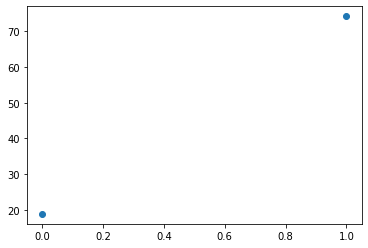

In [218]:
# plotting sex vs survival rate scatter plot
sur_lst = []
for i in range(0, 2):
  total=0
  count=0
  for j in range(len(data['Sex'])):
    if data['Sex'][j]==i:
      total+=1
      if data['Survived'][j]==1:
        count+=1
  sur_lst.append(count*100/total)

print(sur_lst)

plt.scatter([0, 1], sur_lst)
plt.show()

In [219]:
data_np = pd.DataFrame.to_numpy(data)
x_label = data_np[:,:-1]
y_label = np.array(data_np[:,-1]).astype('int')
train_x, test_x, train_y, test_y = split(x_label, y_label, train_size=0.8)

### ***2. Identify the best possible variant of naive bayes classifier for the given dataset. Justify your reason for the same.***

Answer in report.

### ***3. Implement the identified variant of Naive Bayes Classifier using scikit learn,report its performance based on appropriate metrics.(ROC AUC etc)***

In [220]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score as ras

In [221]:
mnb = MultinomialNB()

mnb.fit(train_x, train_y)

predict_y = mnb.predict(test_x)

print("The roc of the Multinomial Naive Bayes is:", ras(test_y, predict_y))

The roc of the Multinomial Naive Bayes is: 0.6148754914809962


### ***4.Perform 5 fold cross validation and summarize the results across the cross-validation sets. Compute the probability of the top class for each row in the testing dataset.***

In [222]:
from sklearn.model_selection import cross_val_score

validation = cross_val_score(mnb, x_label, y_label, cv=5)
print(validation)

[0.59217877 0.71910112 0.70786517 0.74157303 0.71910112]


In [223]:
prob_pred = mnb.predict_proba(test_x)
high_pred = []
for i in range(0, len(prob_pred)):
  if prob_pred[i][0] < prob_pred[i][1]:
    high_pred.append(prob_pred[i][1]) 
  else:
    high_pred.append(prob_pred[i][0])

In [224]:
high_pred

[0.9999349105145189,
 0.9933967450458971,
 0.9899865796905624,
 0.9999996003515238,
 1.0,
 0.9973920060724312,
 0.9999519692812475,
 0.999999085225901,
 0.999936286583704,
 0.9999968435944174,
 0.9999961093522969,
 1.0,
 0.9998340260098788,
 0.9999978233950015,
 0.9980244686968952,
 0.997415378284447,
 0.9705449818630518,
 0.9999949273397541,
 0.9994960068183563,
 0.9999558527895122,
 0.9999877796418044,
 0.9999942833995137,
 0.9999986059036968,
 0.9883287737732455,
 0.9999805645283805,
 0.9999990026704779,
 0.5026728953535867,
 0.9996181626555746,
 0.9765187089141234,
 0.999970509755692,
 0.9991579622526694,
 0.9998235552741345,
 0.999994821015281,
 0.99728289616275,
 0.8833114992049051,
 0.9882378795154568,
 1.0,
 0.9997637901967769,
 0.9994292997297839,
 0.9996745892410203,
 0.9999949273397541,
 0.9999947124263031,
 1.0,
 0.9997219899437917,
 0.9999596061369207,
 0.9993279322409763,
 0.9999999859346503,
 0.9999841918319078,
 0.9990212440366045,
 0.9999906021870822,
 0.99655127885832

### ***5. Make contour plots with the data points to visualize the class-conditional densities. What can you say about the assumption Naive Bayes model is based on from these plots? Explain in your report.***

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


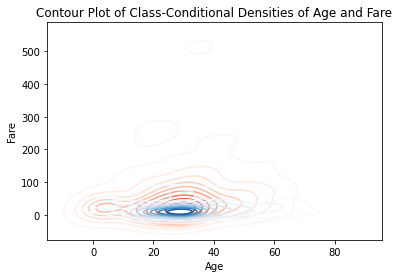

In [225]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a contour plot of the class-conditional densities of "Age" and "Fare" for each class
sns.kdeplot(data[data["Survived"] == 1]["Age"], data[data["Survived"] == 1]["Fare"], cmap="Reds")
sns.kdeplot(data[data["Survived"] == 0]["Age"], data[data["Survived"] == 0]["Fare"], cmap="Blues")

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Contour Plot of Class-Conditional Densities of Age and Fare")

# Show the plot
plt.show()

### ***6. Compare your model with the Decision Tree classifier on the same dataset by performing 5-fold cross-validation and summarizing the results. Justify why one of them works better on this numeric dataset.***

In [226]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier()

validation = cross_val_score(clf, x_label, y_label, cv=5)
print(validation)


[0.73184358 0.7752809  0.81460674 0.76404494 0.80337079]


# ***QUESTION 2***

---

*Using the given [dataset](https://drive.google.com/file/d/1-EyA9vGk9-SuT5eI0lBTQfqG58rxC8qR/view?usp=sharing) to complete the given tasks using only numpy, pandas, seaborn and matplotlib.*

In [227]:
# importing the required modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [228]:
# importing the dataset from google drive and converting it to numpy dataframe
data = pd.read_csv("drive/MyDrive/PRML/Lab 3/ques2_data.csv")
data = pd.DataFrame.to_numpy(data)

In [229]:
# defining input and output label arrays
input_var = data[:,:-1]
output_var = data[:,-1]
output_var = output_var.astype('int')

In [230]:
total_entries = len(data)
num_features = len(data[0])-1
num_classes = 3

### ***a. Use histogram to plot the distribution of samples.***

In [231]:
n_bins = 10 # defining number of bins to be created in histogram

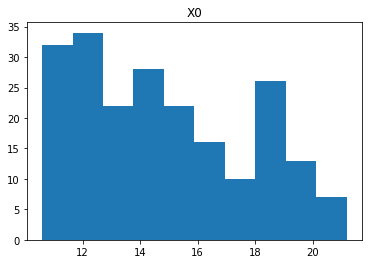

In [232]:
#  Histogram plot of 'X0'
plt.hist(input_var[:,0], bins=n_bins)
plt.title("X0")
plt.show()

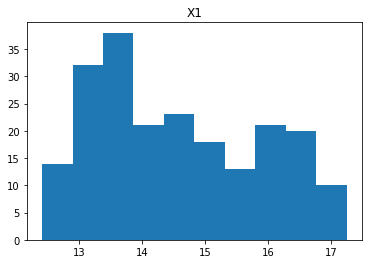

In [233]:
#  Histogram plot of 'X1'
plt.hist(input_var[:,1], bins=n_bins)
plt.title("X1")
plt.show()

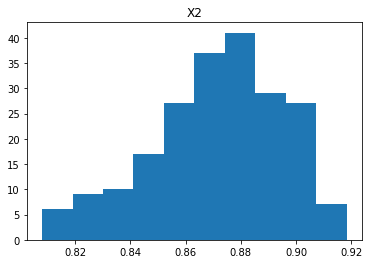

In [234]:
#  Histogram plot of 'X2'
plt.hist(input_var[:,2], bins=n_bins)
plt.title("X2")
plt.show()

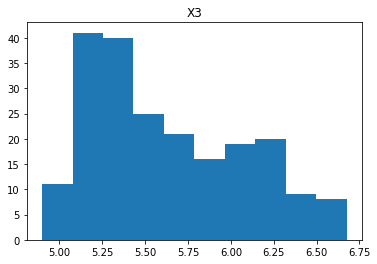

In [235]:
#  Histogram plot of 'X3'
plt.hist(input_var[:,3], bins=n_bins)
plt.title("X3")
plt.show()

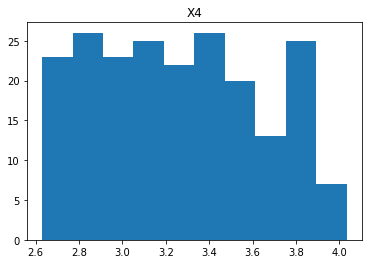

In [236]:
#  Histogram plot of 'X4'
plt.hist(input_var[:,4], bins=n_bins)
plt.title("X4")
plt.show()

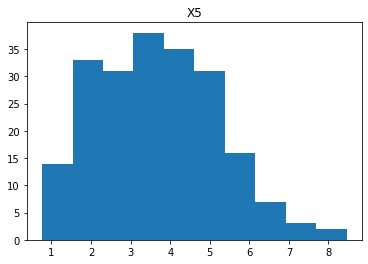

In [237]:
#  Histogram plot of 'X5'
plt.hist(input_var[:,5], bins=n_bins)
plt.title("X5")
plt.show()

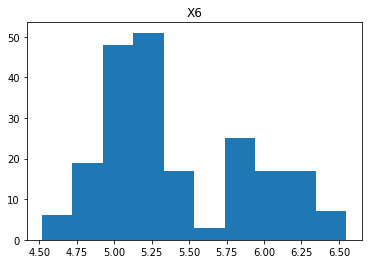

In [238]:
#  Histogram plot of 'X6'
plt.hist(input_var[:,6], bins=n_bins)
plt.title("X6")
plt.show()

### ***b. Determine the prior probability for all the classes.***

In [239]:
# getting unique classes along with their individual counts
classes, count_classes = np.unique(output_var, return_counts=True)

In [240]:
print("Classes present in the data are:", classes)
print("Count of each class is:", count_classes, "respectively")

Classes present in the data are: [1 2 3]
Count of each class is: [70 70 70] respectively


*Prior probability is count of appearance of each class/total count of entries.*

In [241]:
for i in range (1,4):
  print("Prior probability of class '" + str(i) + "' is equal to:", count_classes[i-1]/total_entries)

Prior probability of class '1' is equal to: 0.3333333333333333
Prior probability of class '2' is equal to: 0.3333333333333333
Prior probability of class '3' is equal to: 0.3333333333333333


### ***c. Discretize the features into bins from scratch. Use of pandas, scikit learn and scipy is not allowed for this subpart.***

In [242]:
# function to take one feature array and return its corresponding interval values, bin values and the discrete feature array
def create_bin(array, n_bins = 5):

  min = np.min(array)
  max = np.max(array)

  interval = (max-min)/n_bins

  bin_array = []

  for j in range(0, n_bins):
    elem_array = []

    for k in range(0, total_entries):
      if (interval*j<= array[k]-min < interval*(j+1)):
        elem_array.append(array[k])

    bin_array.append(elem_array)

  bin_array[n_bins-1].append(max)
  bin_array = np.array(bin_array, dtype=object)

  discrete_array = []

  for l in bin_array:
    mean = np.mean(l)
    discrete_array.append(mean)

  for m in range(0, total_entries):
    for l in range(0, n_bins):
      if array[m] in bin_array[l]:
        array[m] = discrete_array[l]

  return (bin_array, discrete_array, array)


In [243]:
bin_dict = {}
discrete_dict = {}

n_bins = 5

discrete_data = []  # to create discrete value dataset

for i in range(0, num_features):
  array = input_var[:,i]

  bin_array, discrete_array, discretized = create_bin(array, n_bins)

  discrete_data.append(discretized)

  bin_dict[str(i)] = bin_array
  discrete_dict[str(i)] = discrete_array

  print("The discretization of feature '" + str(i) + "' is: ", discrete_array)
  print()

discrete_data.append(output_var)
discrete_data = np.array(discrete_data)
discrete_data = np.transpose(discrete_data)

The discretization of feature '0' is:  [11.709545454545454, 13.75, 15.775, 18.356944444444444, 19.8675]

The discretization of feature '1' is:  [13.019782608695657, 13.778135593220341, 14.763902439024392, 15.87970588235294, 16.68]

The discretization of feature '2' is:  [0.8198200000000001, 0.8428185185185184, 0.8640749999999999, 0.8837185714285715, 0.9028]

The discretization of feature '3' is:  [5.131846153846154, 5.416230769230769, 5.768864864864864, 6.133871794871796, 6.494823529411765]

The discretization of feature '4' is:  [2.7708775510204084, 3.057604166666667, 3.3396875, 3.5938787878787872, 3.8395625]

The discretization of feature '5' is:  [1.7947702127659573, 3.134463768115942, 4.577893939393939, 5.9107391304347825, 7.6644000000000005]

The discretization of feature '6' is:  [4.77184, 5.124242424242424, 5.46725, 5.921523809523809, 6.293749999999999]



### ***d. Determine the likelihood/class conditional probabilities for all the classes.***

### ***e. Plot the count of each unique element for each class. Compare the plot with the plot of distribution.***

In [244]:
dis_data = pd.DataFrame(discrete_data)

In [245]:
dis_data

,0,1,2,3,4,5,6,7
0,15.775000,14.763902,0.864075,5.768865,3.339688,1.794770,5.124242,1.0
1,15.775000,14.763902,0.883719,5.416231,3.339688,1.794770,5.124242,1.0
2,13.750000,13.778136,0.902800,5.416231,3.339688,3.134464,4.771840,1.0
3,13.750000,13.778136,0.883719,5.416231,3.339688,1.794770,4.771840,1.0
4,15.775000,14.763902,0.902800,5.768865,3.593879,1.794770,5.124242,1.0
...,...,...,...,...,...,...,...,...
205,11.709545,13.019783,0.883719,5.131846,3.057604,3.134464,4.771840,3.0
206,11.709545,13.019783,0.842819,5.131846,2.770878,4.577894,5.124242,3.0
207,13.750000,13.778136,0.883719,5.131846,3.339688,7.664400,5.124242,3.0
208,11.709545,13.019783,0.842819,5.131846,2.770878,3.134464,5.124242,3.0


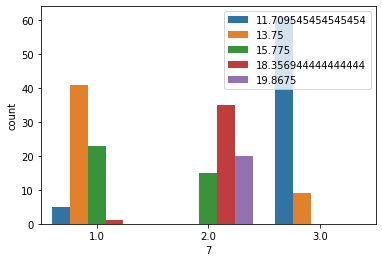

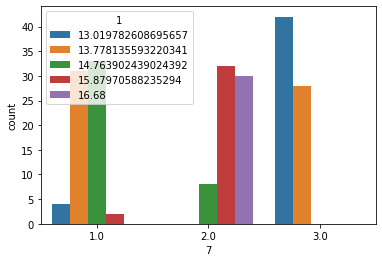

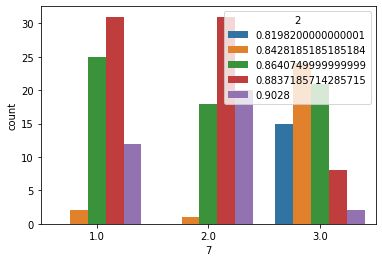

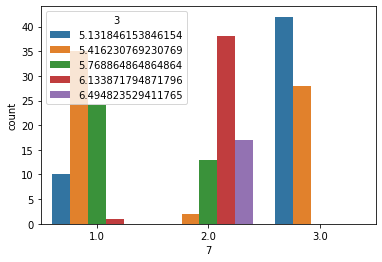

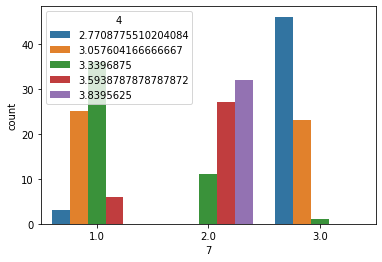

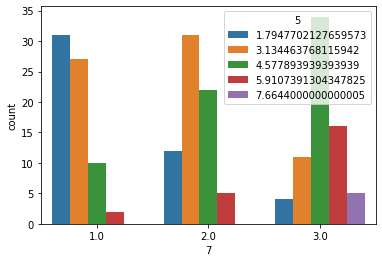

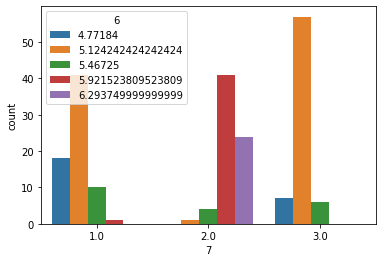

In [246]:
sns.countplot(x=7, data=dis_data, hue=0)
plt.show()
sns.countplot(x=7, data=dis_data, hue=1)
plt.show()
sns.countplot(x=7, data=dis_data, hue=2)
plt.show()
sns.countplot(x=7, data=dis_data, hue=3)
plt.show()
sns.countplot(x=7, data=dis_data, hue=4)
plt.show()
sns.countplot(x=7, data=dis_data, hue=5)
plt.show()
sns.countplot(x=7, data=dis_data, hue=6)
plt.show()

### ***f. Calculate the posterior probabilities and plot them in a single graph. Analyze the plot.***